<a href="https://colab.research.google.com/github/ArnavJalan-30/digital_image_processing/blob/main/Basic_DIP_2210110192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python for Image Processing
* Python packages needed for image processing: numpy, scipy, opencv-python.
* IDE suitable for Windows: jupyter notebook, MS visual studio
* IDE suitable for Linux: jupyter notebook, PyCharm

#  Import packages
* **numpy package**: Numerical computing package for linear algebra and matrix computing
* **cv2 package**: OpenCV wrapper package in python for image processing and computer vision
* **matplotlib.pyplot**: pyplot image package for plotting and showing image and plots

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Loading Image

Image Size is (571, 482)


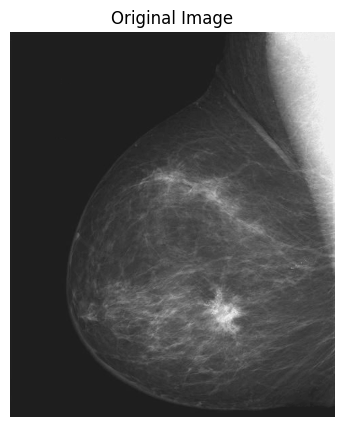

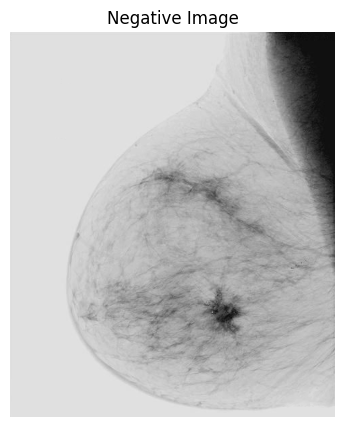

In [6]:
image_path = '/content/mammogram_digital_Xray.tif'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check image size
print('Image Size is {}'.format(img.shape))

# Display the original image
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Create a negative image
L = np.max(img)
neg_img = L - 1 - img

# Display the negative image
plt.figure(figsize=(5,5))
plt.imshow(neg_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Negative Image')
plt.show()

In [7]:
img.dtype

dtype('uint8')

# Image Negatives
* Let $L$ be maximum intensity in **img**
* Negative image: **neg_img** = $L - 1 - $ **img**

# Contrast Stretching
* Implementation for following function for Beans image

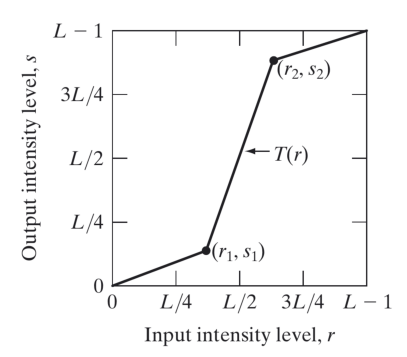

In [8]:
stretch_plot = cv.imread('/content/Histogram_stretching_plot.png')
plt.figure(figsize=(5,5))
plt.imshow(stretch_plot)
plt.axis('off')
plt.show()


In [9]:
r1 = 90
s1 = 10
r2 = 140
s2 = 245

Size of image is (500, 500)
Minimum and Maximum intensity value in image is (91,138)


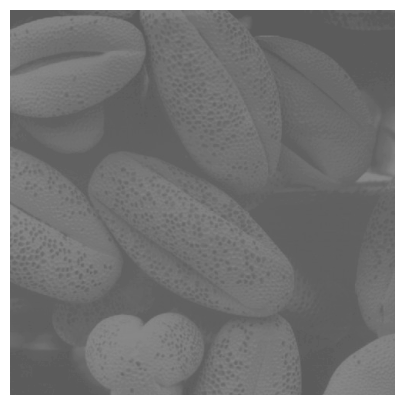

In [10]:
img1 = cv.imread('/content/beans_low_contrast.tif', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img1.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img1) ,np.max(img1)))
plt.figure(figsize=(5,5))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

* So contrast stretching is useful
* now we have to create $s = T(r)$ mapping

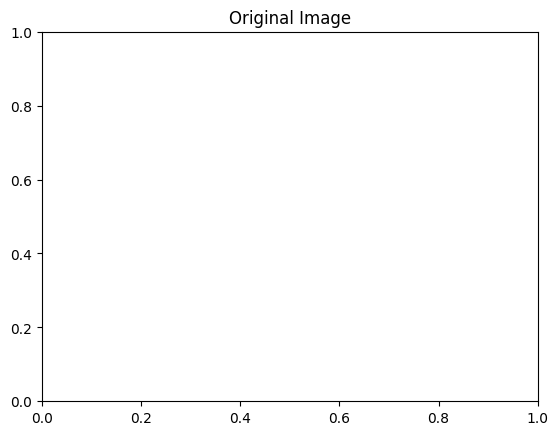

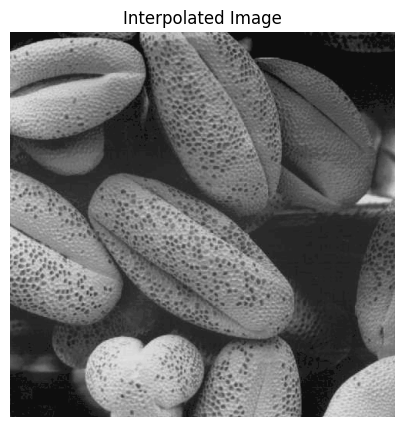

In [11]:
plt.title('Original Image')
plt.show()

# Interpolate the image with given constraints
def interpolate_image(img1, r1, s1, r2, s2):
    lut = np.interp(np.arange(256), [r1, r2], [s1, s2]).astype(np.uint8)
    interpolated_img1 = cv.LUT(img1, lut)
    return interpolated_img1

# Set interpolation constraints
r1, s1 = 90, 10
r2, s2 = 140, 245

# Interpolate the image
interpolated_img = interpolate_image(img1, r1, s1, r2, s2)

# Display the interpolated image
plt.figure(figsize=(5,5))
plt.imshow(interpolated_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Interpolated Image')
plt.show()

# Power-law (Gamma) Transformations
* $s = c.(\frac{r}{d})^{\gamma}$

Size of image is (769, 765)
Minimum and Maximum intensity value in image is (0,255)


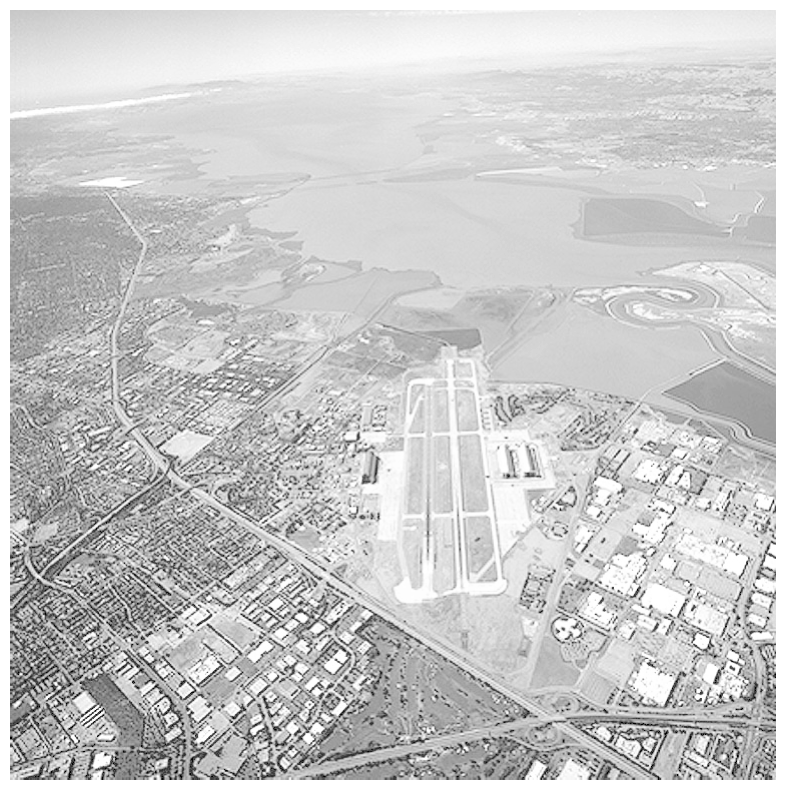

In [12]:
img3 = cv.imread('/content/washed_out_aerial_image.tif', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img3.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img3) ,np.max(img3)))
plt.figure(figsize=(10,10))
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

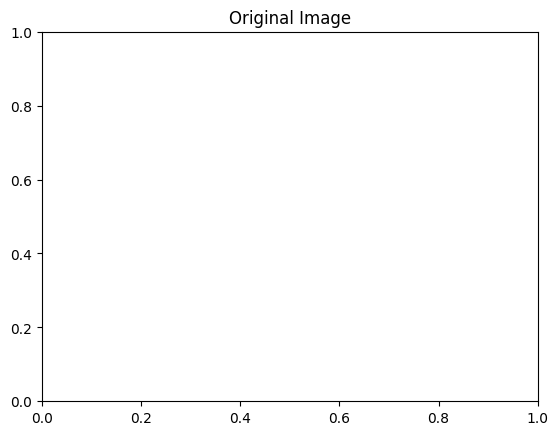

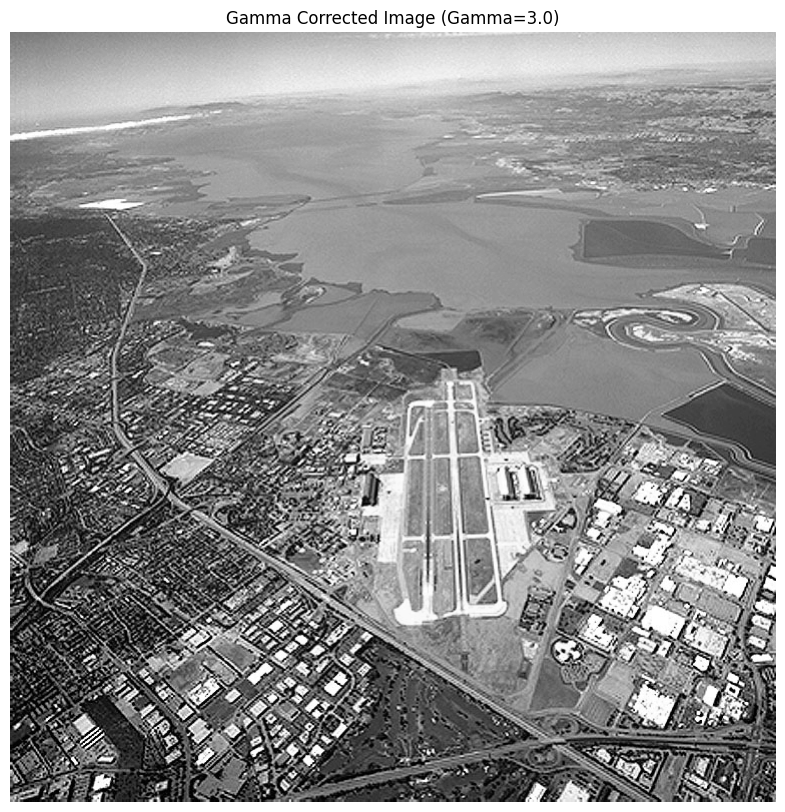

In [13]:
plt.title('Original Image')
plt.show()

# Power-law gamma correction function
def gamma_correction(img, gamma):
    corrected_img = np.power(img / 255.0, gamma) * 255.0
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)
    return corrected_img

# Set the gamma value for correction
gamma = 3.0  # You can adjust this value based on your requirements

# Apply power-law gamma correction
gamma_corrected_img = gamma_correction(img3, gamma)

# Display the gamma-corrected image
plt.figure(figsize=(10,10))
plt.imshow(gamma_corrected_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Gamma Corrected Image (Gamma={})'.format(gamma))
plt.show()